In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from Energy_Models.NBEATS import NBeatsNet

In [2]:
df = pd.read_csv("C:\\Users\\delll\\Downloads\\energydata_complete.csv",index_col="date")

In [3]:
scaler = MinMaxScaler().fit(df)
df    = pd.DataFrame(scaler.transform(df))

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [4]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(X ,y ,test_size=0.30,random_state=35)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
X_train = np.array(X_train)
X_test  = np.array(X_test)

In [5]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((13814, 27), (2961, 27), (13814,), (2961,))

In [6]:
X_val = np.array(X_val)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [8]:
X_train.shape ,X_test.shape 

((13814, 1, 27), (2961, 1, 27))

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = NBeatsNet(1,27,1)

In [10]:
model.summary()

Model: "forecast"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_variable (InputLayer)    [(None, 1, 27)]      0           []                               
                                                                                                  
 lambda (Lambda)                (None, 1)            0           ['input_variable[0][0]']         
                                                                                                  
 lambda_1 (Lambda)              (None, 1)            0           ['input_variable[0][0]']         
                                                                                                  
 lambda_2 (Lambda)              (None, 1)            0           ['input_variable[0][0]']         
                                                                                           

                                                                  'lambda_24[0][0]',              
                                                                  'lambda_25[0][0]',              
                                                                  'lambda_26[0][0]']              
                                                                                                  
 0/0/trend/d2 (Dense)           (None, 256)          65792       ['0/0/trend/d1[0][0]',           
                                                                  '0/0/trend/d1[1][0]',           
                                                                  '0/0/trend/d1[2][0]',           
                                                                  '0/0/trend/d1[3][0]',           
                                                                  '0/0/trend/d1[4][0]',           
                                                                  '0/0/trend/d1[5][0]',           
          

                                                                  '0/0/trend/d3[23][0]',          
                                                                  '0/0/trend/d3[24][0]',          
                                                                  '0/0/trend/d3[25][0]',          
                                                                  '0/0/trend/d3[26][0]']          
                                                                                                  
 0/0/trend/theta_f_b (Dense)    (None, 4)            1024        ['0/0/trend/d4[0][0]',           
                                                                  '0/0/trend/d4[0][0]',           
                                                                  '0/0/trend/d4[1][0]',           
                                                                  '0/0/trend/d4[1][0]',           
                                                                  '0/0/trend/d4[2][0]',           
          

                                                                  '0/0/trend/theta_f_b[47][0]',   
                                                                  '0/0/trend/theta_f_b[49][0]',   
                                                                  '0/0/trend/theta_f_b[51][0]',   
                                                                  '0/0/trend/theta_f_b[53][0]']   
                                                                                                  
 subtract (Subtract)            (None, 1)            0           ['lambda[0][0]',                 
                                                                  'lambda_27[0][0]']              
                                                                                                  
 subtract_1 (Subtract)          (None, 1)            0           ['lambda_1[0][0]',               
                                                                  'lambda_27[1][0]']              
          

 subtract_26 (Subtract)         (None, 1)            0           ['lambda_26[0][0]',              
                                                                  'lambda_27[26][0]']             
                                                                                                  
 0/1/trend/d1 (Dense)           (None, 256)          512         ['subtract[0][0]',               
                                                                  'subtract_1[0][0]',             
                                                                  'subtract_2[0][0]',             
                                                                  'subtract_3[0][0]',             
                                                                  'subtract_4[0][0]',             
                                                                  'subtract_5[0][0]',             
                                                                  'subtract_6[0][0]',             
          

                                                                  '0/1/trend/d2[24][0]',          
                                                                  '0/1/trend/d2[25][0]',          
                                                                  '0/1/trend/d2[26][0]']          
                                                                                                  
 0/1/trend/d4 (Dense)           (None, 256)          65792       ['0/1/trend/d3[0][0]',           
                                                                  '0/1/trend/d3[1][0]',           
                                                                  '0/1/trend/d3[2][0]',           
                                                                  '0/1/trend/d3[3][0]',           
                                                                  '0/1/trend/d3[4][0]',           
                                                                  '0/1/trend/d3[5][0]',           
          

                                                                  '0/1/trend/d4[25][0]',          
                                                                  '0/1/trend/d4[26][0]',          
                                                                  '0/1/trend/d4[26][0]']          
                                                                                                  
 lambda_29 (Lambda)             (None, 1)            0           ['0/1/trend/theta_f_b[1][0]',    
                                                                  '0/1/trend/theta_f_b[3][0]',    
                                                                  '0/1/trend/theta_f_b[5][0]',    
                                                                  '0/1/trend/theta_f_b[7][0]',    
                                                                  '0/1/trend/theta_f_b[9][0]',    
                                                                  '0/1/trend/theta_f_b[11][0]',   
          

 subtract_44 (Subtract)         (None, 1)            0           ['subtract_17[0][0]',            
                                                                  'lambda_29[17][0]']             
                                                                                                  
 subtract_45 (Subtract)         (None, 1)            0           ['subtract_18[0][0]',            
                                                                  'lambda_29[18][0]']             
                                                                                                  
 subtract_46 (Subtract)         (None, 1)            0           ['subtract_19[0][0]',            
                                                                  'lambda_29[19][0]']             
                                                                                                  
 subtract_47 (Subtract)         (None, 1)            0           ['subtract_20[0][0]',            
          

                                                                  '0/2/trend/d1[25][0]',          
                                                                  '0/2/trend/d1[26][0]']          
                                                                                                  
 0/2/trend/d3 (Dense)           (None, 256)          65792       ['0/2/trend/d2[0][0]',           
                                                                  '0/2/trend/d2[1][0]',           
                                                                  '0/2/trend/d2[2][0]',           
                                                                  '0/2/trend/d2[3][0]',           
                                                                  '0/2/trend/d2[4][0]',           
                                                                  '0/2/trend/d2[5][0]',           
                                                                  '0/2/trend/d2[6][0]',           
          

                                                                  '0/2/trend/d4[12][0]',          
                                                                  '0/2/trend/d4[12][0]',          
                                                                  '0/2/trend/d4[13][0]',          
                                                                  '0/2/trend/d4[13][0]',          
                                                                  '0/2/trend/d4[14][0]',          
                                                                  '0/2/trend/d4[14][0]',          
                                                                  '0/2/trend/d4[15][0]',          
                                                                  '0/2/trend/d4[15][0]',          
                                                                  '0/2/trend/d4[16][0]',          
                                                                  '0/2/trend/d4[16][0]',          
          

 subtract_62 (Subtract)         (None, 1)            0           ['subtract_35[0][0]',            
                                                                  'lambda_31[8][0]']              
                                                                                                  
 subtract_63 (Subtract)         (None, 1)            0           ['subtract_36[0][0]',            
                                                                  'lambda_31[9][0]']              
                                                                                                  
 subtract_64 (Subtract)         (None, 1)            0           ['subtract_37[0][0]',            
                                                                  'lambda_31[10][0]']             
                                                                                                  
 subtract_65 (Subtract)         (None, 1)            0           ['subtract_38[0][0]',            
          

                                                                  'subtract_80[0][0]']            
                                                                                                  
 1/0/seasonality/d2 (Dense)     (None, 256)          65792       ['1/0/seasonality/d1[0][0]',     
                                                                  '1/0/seasonality/d1[1][0]',     
                                                                  '1/0/seasonality/d1[2][0]',     
                                                                  '1/0/seasonality/d1[3][0]',     
                                                                  '1/0/seasonality/d1[4][0]',     
                                                                  '1/0/seasonality/d1[5][0]',     
                                                                  '1/0/seasonality/d1[6][0]',     
                                                                  '1/0/seasonality/d1[7][0]',     
          

                                                                  '1/0/seasonality/d3[25][0]',    
                                                                  '1/0/seasonality/d3[26][0]']    
                                                                                                  
 1/0/seasonality/theta_b (Dense  (None, 1)           256         ['1/0/seasonality/d4[0][0]',     
 )                                                                '1/0/seasonality/d4[1][0]',     
                                                                  '1/0/seasonality/d4[2][0]',     
                                                                  '1/0/seasonality/d4[3][0]',     
                                                                  '1/0/seasonality/d4[4][0]',     
                                                                  '1/0/seasonality/d4[5][0]',     
                                                                  '1/0/seasonality/d4[6][0]',     
          

 subtract_86 (Subtract)         (None, 1)            0           ['subtract_59[0][0]',            
                                                                  'lambda_33[5][0]']              
                                                                                                  
 subtract_87 (Subtract)         (None, 1)            0           ['subtract_60[0][0]',            
                                                                  'lambda_33[6][0]']              
                                                                                                  
 subtract_88 (Subtract)         (None, 1)            0           ['subtract_61[0][0]',            
                                                                  'lambda_33[7][0]']              
                                                                                                  
 subtract_89 (Subtract)         (None, 1)            0           ['subtract_62[0][0]',            
          

                                                                  'subtract_98[0][0]',            
                                                                  'subtract_99[0][0]',            
                                                                  'subtract_100[0][0]',           
                                                                  'subtract_101[0][0]',           
                                                                  'subtract_102[0][0]',           
                                                                  'subtract_103[0][0]',           
                                                                  'subtract_104[0][0]',           
                                                                  'subtract_105[0][0]',           
                                                                  'subtract_106[0][0]',           
                                                                  'subtract_107[0][0]']           
          

                                                                  '1/1/seasonality/d3[16][0]',    
                                                                  '1/1/seasonality/d3[17][0]',    
                                                                  '1/1/seasonality/d3[18][0]',    
                                                                  '1/1/seasonality/d3[19][0]',    
                                                                  '1/1/seasonality/d3[20][0]',    
                                                                  '1/1/seasonality/d3[21][0]',    
                                                                  '1/1/seasonality/d3[22][0]',    
                                                                  '1/1/seasonality/d3[23][0]',    
                                                                  '1/1/seasonality/d3[24][0]',    
                                                                  '1/1/seasonality/d3[25][0]',    
          

 subtract_110 (Subtract)        (None, 1)            0           ['subtract_83[0][0]',            
                                                                  'lambda_35[2][0]']              
                                                                                                  
 subtract_111 (Subtract)        (None, 1)            0           ['subtract_84[0][0]',            
                                                                  'lambda_35[3][0]']              
                                                                                                  
 subtract_112 (Subtract)        (None, 1)            0           ['subtract_85[0][0]',            
                                                                  'lambda_35[4][0]']              
                                                                                                  
 subtract_113 (Subtract)        (None, 1)            0           ['subtract_86[0][0]',            
          

                                                                  'subtract_116[0][0]',           
                                                                  'subtract_117[0][0]',           
                                                                  'subtract_118[0][0]',           
                                                                  'subtract_119[0][0]',           
                                                                  'subtract_120[0][0]',           
                                                                  'subtract_121[0][0]',           
                                                                  'subtract_122[0][0]',           
                                                                  'subtract_123[0][0]',           
                                                                  'subtract_124[0][0]',           
                                                                  'subtract_125[0][0]',           
          

                                                                  '1/2/seasonality/d1[7][0]',     
                                                                  '1/2/seasonality/d1[8][0]',     
                                                                  '1/2/seasonality/d1[9][0]',     
                                                                  '1/2/seasonality/d1[10][0]',    
                                                                  '1/2/seasonality/d1[11][0]',    
                                                                  '1/2/seasonality/d1[12][0]',    
                                                                  '1/2/seasonality/d1[13][0]',    
                                                                  '1/2/seasonality/d1[14][0]',    
                                                                  '1/2/seasonality/d1[15][0]',    
                                                                  '1/2/seasonality/d1[16][0]',    
          

 1/2/seasonality/d3 (Dense)     (None, 256)          65792       ['1/2/seasonality/d2[0][0]',     
                                                                  '1/2/seasonality/d2[1][0]',     
                                                                  '1/2/seasonality/d2[2][0]',     
                                                                  '1/2/seasonality/d2[3][0]',     
                                                                  '1/2/seasonality/d2[4][0]',     
                                                                  '1/2/seasonality/d2[5][0]',     
                                                                  '1/2/seasonality/d2[6][0]',     
                                                                  '1/2/seasonality/d2[7][0]',     
                                                                  '1/2/seasonality/d2[8][0]',     
                                                                  '1/2/seasonality/d2[9][0]',     
          

 ambda)                                                                                           
                                                                                                  
 stack_0-TrendBlock_1_Dim_10 (L  (None, 1)           0           ['lambda_30[10][0]']             
 ambda)                                                                                           
                                                                                                  
 stack_0-TrendBlock_0_Dim_11 (L  (None, 1)           0           ['lambda_28[11][0]']             
 ambda)                                                                                           
                                                                                                  
 stack_0-TrendBlock_1_Dim_11 (L  (None, 1)           0           ['lambda_30[11][0]']             
 ambda)                                                                                           
          

 stack_0-TrendBlock_0_Dim_24 (L  (None, 1)           0           ['lambda_28[24][0]']             
 ambda)                                                                                           
                                                                                                  
 stack_0-TrendBlock_1_Dim_24 (L  (None, 1)           0           ['lambda_30[24][0]']             
 ambda)                                                                                           
                                                                                                  
 stack_0-TrendBlock_0_Dim_25 (L  (None, 1)           0           ['lambda_28[25][0]']             
 ambda)                                                                                           
                                                                                                  
 stack_0-TrendBlock_1_Dim_25 (L  (None, 1)           0           ['lambda_30[25][0]']             
 ambda)   

                                                                  '1/1/seasonality/d4[20][0]',    
                                                                  '1/1/seasonality/d4[21][0]',    
                                                                  '1/1/seasonality/d4[22][0]',    
                                                                  '1/1/seasonality/d4[23][0]',    
                                                                  '1/1/seasonality/d4[24][0]',    
                                                                  '1/1/seasonality/d4[25][0]',    
                                                                  '1/1/seasonality/d4[26][0]']    
                                                                                                  
 1/2/seasonality/d4 (Dense)     (None, 256)          65792       ['1/2/seasonality/d3[0][0]',     
                                                                  '1/2/seasonality/d3[1][0]',     
          

                                                                                                  
 add_7 (Add)                    (None, 1)            0           ['stack_0-TrendBlock_0_Dim_7[0][0
                                                                 ]',                              
                                                                  'stack_0-TrendBlock_1_Dim_7[0][0
                                                                 ]']                              
                                                                                                  
 stack_0-TrendBlock_2_Dim_7 (La  (None, 1)           0           ['lambda_32[7][0]']              
 mbda)                                                                                            
                                                                                                  
 add_8 (Add)                    (None, 1)            0           ['stack_0-TrendBlock_0_Dim_8[0][0
          

                                                                  'stack_0-TrendBlock_1_Dim_17[0][
                                                                 0]']                             
                                                                                                  
 stack_0-TrendBlock_2_Dim_17 (L  (None, 1)           0           ['lambda_32[17][0]']             
 ambda)                                                                                           
                                                                                                  
 add_18 (Add)                   (None, 1)            0           ['stack_0-TrendBlock_0_Dim_18[0][
                                                                 0]',                             
                                                                  'stack_0-TrendBlock_1_Dim_18[0][
                                                                 0]']                             
          

 _0 (Lambda)                                                                                      
                                                                                                  
 lambda_36 (Lambda)             (None, 1)            0           ['1/1/seasonality/theta_f[0][0]',
                                                                  '1/1/seasonality/theta_f[1][0]',
                                                                  '1/1/seasonality/theta_f[2][0]',
                                                                  '1/1/seasonality/theta_f[3][0]',
                                                                  '1/1/seasonality/theta_f[4][0]',
                                                                  '1/1/seasonality/theta_f[5][0]',
                                                                  '1/1/seasonality/theta_f[6][0]',
                                                                  '1/1/seasonality/theta_f[7][0]',
          

                                                                 ]']                              
                                                                                                  
 stack_1-SeasonalityBlock_0_Dim  (None, 1)           0           ['lambda_34[3][0]']              
 _3 (Lambda)                                                                                      
                                                                                                  
 add_31 (Add)                   (None, 1)            0           ['add_4[0][0]',                  
                                                                  'stack_0-TrendBlock_2_Dim_4[0][0
                                                                 ]']                              
                                                                                                  
 stack_1-SeasonalityBlock_0_Dim  (None, 1)           0           ['lambda_34[4][0]']              
 _4 (Lambd

                                                                  'stack_0-TrendBlock_2_Dim_15[0][
                                                                 0]']                             
                                                                                                  
 stack_1-SeasonalityBlock_0_Dim  (None, 1)           0           ['lambda_34[15][0]']             
 _15 (Lambda)                                                                                     
                                                                                                  
 add_43 (Add)                   (None, 1)            0           ['add_16[0][0]',                 
                                                                  'stack_0-TrendBlock_2_Dim_16[0][
                                                                 0]']                             
                                                                                                  
 stack_1-S

 add_54 (Add)                   (None, 1)            0           ['add_27[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_0_Dim_
                                                                 0[0][0]']                        
                                                                                                  
 stack_1-SeasonalityBlock_1_Dim  (None, 1)           0           ['lambda_36[0][0]']              
 _0 (Lambda)                                                                                      
                                                                                                  
 lambda_38 (Lambda)             (None, 1)            0           ['1/2/seasonality/theta_f[0][0]',
                                                                  '1/2/seasonality/theta_f[1][0]',
                                                                  '1/2/seasonality/theta_f[2][0]',
          

 stack_1-SeasonalityBlock_1_Dim  (None, 1)           0           ['lambda_36[6][0]']              
 _6 (Lambda)                                                                                      
                                                                                                  
 add_61 (Add)                   (None, 1)            0           ['add_34[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_0_Dim_
                                                                 7[0][0]']                        
                                                                                                  
 stack_1-SeasonalityBlock_1_Dim  (None, 1)           0           ['lambda_36[7][0]']              
 _7 (Lambda)                                                                                      
                                                                                                  
 add_62 (A

                                                                                                  
 stack_1-SeasonalityBlock_1_Dim  (None, 1)           0           ['lambda_36[18][0]']             
 _18 (Lambda)                                                                                     
                                                                                                  
 add_73 (Add)                   (None, 1)            0           ['add_46[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_0_Dim_
                                                                 19[0][0]']                       
                                                                                                  
 stack_1-SeasonalityBlock_1_Dim  (None, 1)           0           ['lambda_36[19][0]']             
 _19 (Lambda)                                                                                     
          

                                                                 3[0][0]']                        
                                                                                                  
 stack_1-SeasonalityBlock_2_Dim  (None, 1)           0           ['lambda_38[3][0]']              
 _3 (Lambda)                                                                                      
                                                                                                  
 add_85 (Add)                   (None, 1)            0           ['add_58[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_1_Dim_
                                                                 4[0][0]']                        
                                                                                                  
 stack_1-SeasonalityBlock_2_Dim  (None, 1)           0           ['lambda_38[4][0]']              
 _4 (Lambd

                                                                  'stack_1-SeasonalityBlock_1_Dim_
                                                                 15[0][0]']                       
                                                                                                  
 stack_1-SeasonalityBlock_2_Dim  (None, 1)           0           ['lambda_38[15][0]']             
 _15 (Lambda)                                                                                     
                                                                                                  
 add_97 (Add)                   (None, 1)            0           ['add_70[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_1_Dim_
                                                                 16[0][0]']                       
                                                                                                  
 stack_1-S

 add_108 (Add)                  (None, 1)            0           ['add_81[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_2_Dim_
                                                                 0[0][0]']                        
                                                                                                  
 add_109 (Add)                  (None, 1)            0           ['add_82[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_2_Dim_
                                                                 1[0][0]']                        
                                                                                                  
 add_110 (Add)                  (None, 1)            0           ['add_83[0][0]',                 
                                                                  'stack_1-SeasonalityBlock_2_Dim_
          

                                                                                                  
 add_129 (Add)                  (None, 1)            0           ['add_102[0][0]',                
                                                                  'stack_1-SeasonalityBlock_2_Dim_
                                                                 21[0][0]']                       
                                                                                                  
 add_130 (Add)                  (None, 1)            0           ['add_103[0][0]',                
                                                                  'stack_1-SeasonalityBlock_2_Dim_
                                                                 22[0][0]']                       
                                                                                                  
 add_131 (Add)                  (None, 1)            0           ['add_104[0][0]',                
          

                                                                  'reshape_8[0][0]',              
                                                                  'reshape_10[0][0]',             
                                                                  'reshape_12[0][0]',             
                                                                  'reshape_14[0][0]',             
                                                                  'reshape_16[0][0]',             
                                                                  'reshape_18[0][0]',             
                                                                  'reshape_20[0][0]',             
                                                                  'reshape_22[0][0]',             
                                                                  'reshape_24[0][0]',             
                                                                  'reshape_26[0][0]',             
          

In [11]:
model.compile(optimizer='Adam', loss ='mae')
history = model.fit(X_train , y_train, epochs=100, batch_size=64, verbose= 1,validation_split=0.2,callbacks=callback)

Epoch 1/100
173/173 [==============================] - 184s 668ms/step - loss: 0.0864 - val_loss: 0.0817
Epoch 2/100
173/173 [==============================] - 123s 711ms/step - loss: 0.0821 - val_loss: 0.0817
Epoch 3/100
173/173 [==============================] - 124s 715ms/step - loss: 0.0821 - val_loss: 0.0817
Epoch 4/100
173/173 [==============================] - 126s 727ms/step - loss: 0.0821 - val_loss: 0.0817
Epoch 5/100
173/173 [==============================] - 145s 838ms/step - loss: 0.0821 - val_loss: 0.0817
Epoch 6/100
173/173 [==============================] - 139s 806ms/step - loss: 0.0821 - val_loss: 0.0817
Epoch 7/100
173/173 [==============================] - 130s 748ms/step - loss: 0.0821 - val_loss: 0.0817
Epoch 8/100
173/173 [==============================] - 132s 764ms/step - loss: 0.0821 - val_loss: 0.0817
Epoch 9/100
173/173 [==============================] - 134s 776ms/step - loss: 0.0821 - val_loss: 0.0817


In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))
def root_mean_squared_log_error(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: # check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5
def print_metrics():
    print('Train   RMSE  value   : %.3f ' % root_mean_squared_error(y_train, model.predict(X_train)))
    print('Train   MSE   value   : %.3f ' % mean_squared_error(y_train, model.predict(X_train)))
    print('Train   R2    value   : %.3f ' % r2_score(y_train,model.predict(X_train)))
    print('Train   MAPE  value   : %.3f ' % mean_absolute_percentage_error(y_train, model.predict(X_train)))
    print('Train   MAE   value   : %.3f ' % mean_absolute_error(y_train, model.predict(X_train)))
    print('---------------------------------------------')
    print('Test    RMSE  value   : %.3f ' % root_mean_squared_error(y_test, model.predict(X_test)))
    print('Test    MSE   value   : %.3f ' % mean_squared_error(y_test, model.predict(X_test)))
    print('Test    R2    value   : %.3f ' % r2_score(y_test, model.predict(X_test)))
    print('Test    MAPE  value   : %.3f ' % mean_absolute_percentage_error(y_test, model.predict(X_test)))
    print('Test    MAE   value   : %.3f ' % mean_absolute_error(y_test, model.predict(X_test)))

In [13]:
print_metrics()

432/432 [==============================] - 106s 196ms/step
Train   RMSE  value   : 0.126 
432/432 [==============================] - 84s 195ms/step
Train   MSE   value   : 0.016 
432/432 [==============================] - 82s 190ms/step
Train   R2    value   : -0.727 
432/432 [==============================] - 81s 188ms/step
Train   MAPE  value   : 1.003 
432/432 [==============================] - 81s 187ms/step
Train   MAE   value   : 0.082 
---------------------------------------------
93/93 [==============================] - 18s 191ms/step
Test    RMSE  value   : 0.122 
93/93 [==============================] - 17s 185ms/step
Test    MSE   value   : 0.015 
93/93 [==============================] - 17s 180ms/step
Test    R2    value   : -0.777 
93/93 [==============================] - 17s 183ms/step
Test    MAPE  value   : 1.000 
93/93 [==============================] - 17s 181ms/step
Test    MAE   value   : 0.081 


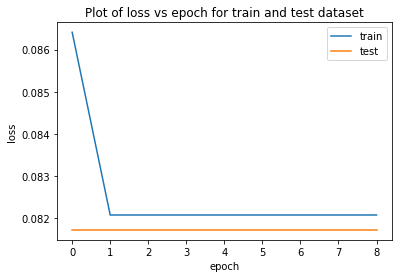

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()